# Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import Data Frame

In [2]:
df_full = pd.read_pickle (r'C:\Users\jmanc\OneDrive\Desktop\InstaCart Basket Analysis\02 Data\Prepared Data\ICB_full_merge.pkl')

# Creating Charts

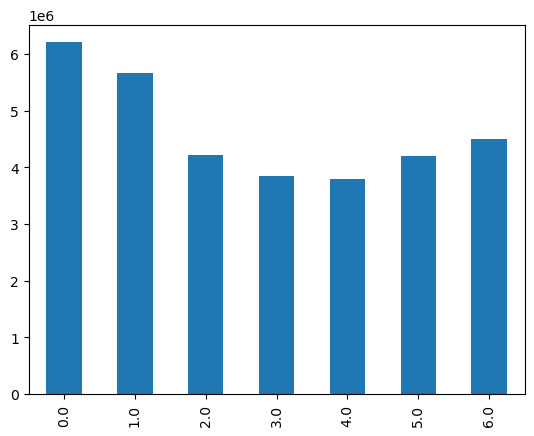

In [3]:
# Bar Chart
bar = df_full['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [10]:
bar.figure.savefig(r'C:\Users\jmanc\OneDrive\Desktop\InstaCart Basket Analysis\04 Analysis\Visualizations\Bar_ODoW')

<Axes: ylabel='Frequency'>

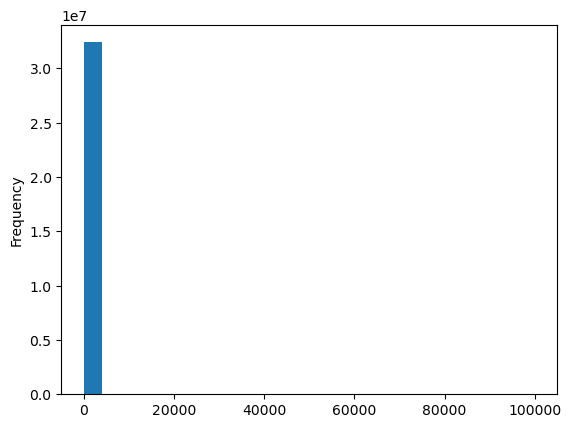

In [4]:
# Histograms and Scatter Plots
df_full['prices'].plot.hist(bins = 25)

In [5]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32435059 entries, 0 to 32435058
Data columns (total 20 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                float64 
 1   user_id                 float64 
 2   order_number            float64 
 3   orders_day_of_week      float64 
 4   hour_of_order           float64 
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       float64 
 8   reordered               float64 
 9   product_name            object  
 10  aisle_id                float64 
 11  department_id           float64 
 12  prices                  float64 
 13  _merge                  category
 14  max_order               float64 
 15  loyalty_flag            object  
 16  mean_price              float64 
 17  spending_flag           object  
 18  med_dspo                float64 
 19  frequent_shopper        object  
dtypes: category(1), float64(14), int64(1), objec

<Axes: xlabel='prices', ylabel='prices'>

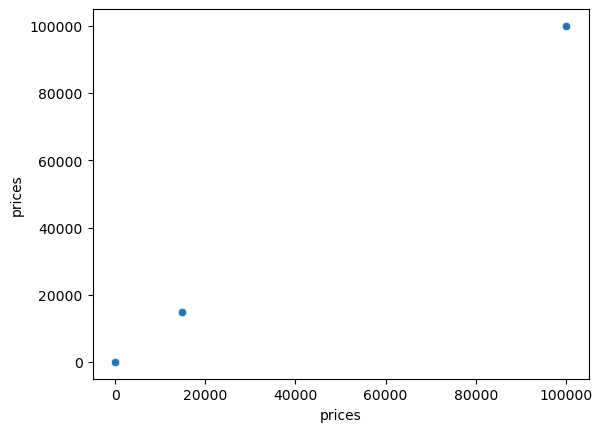

In [6]:
sns.scatterplot(x = 'prices', y = 'prices',data = df_full)

In [7]:
df_full.loc[df_full['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,hour_of_order,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,max_order,loyalty_flag,mean_price,spending_flag,med_dspo,frequent_shopper
10030345,912404.0,17.0,12.0,2.0,14.0,5.0,21553,5.0,0.0,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,both,40.0,regular customer,108.648299,high spender,5.0,frequent
10030346,603376.0,17.0,22.0,6.0,16.0,4.0,21553,3.0,1.0,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,both,40.0,regular customer,108.648299,high spender,5.0,frequent
10030347,3264360.0,135.0,2.0,2.0,21.0,13.0,21553,6.0,0.0,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,both,4.0,new customer,1154.792308,high spender,12.0,regular
10030348,892534.0,135.0,3.0,0.0,8.0,12.0,21553,3.0,1.0,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,both,4.0,new customer,1154.792308,high spender,12.0,regular
10030349,229704.0,342.0,8.0,1.0,19.0,30.0,21553,9.0,0.0,Lowfat 2% Milkfat Cottage Cheese,108.0,16.0,14900.0,both,16.0,regular customer,114.426619,high spender,23.0,non-frequent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29194168,2249946.0,204099.0,29.0,0.0,8.0,4.0,33664,1.0,0.0,2 % Reduced Fat Milk,84.0,16.0,99999.0,both,39.0,regular customer,1106.743956,high spender,4.0,frequent
29194169,2363282.0,204099.0,31.0,0.0,9.0,2.0,33664,1.0,1.0,2 % Reduced Fat Milk,84.0,16.0,99999.0,both,39.0,regular customer,1106.743956,high spender,4.0,frequent
29194170,3181945.0,204395.0,13.0,3.0,15.0,8.0,33664,25.0,0.0,2 % Reduced Fat Milk,84.0,16.0,99999.0,both,15.0,regular customer,451.153540,high spender,5.0,frequent
29194171,2486215.0,205227.0,7.0,3.0,20.0,4.0,33664,8.0,0.0,2 % Reduced Fat Milk,84.0,16.0,99999.0,both,12.0,regular customer,1178.381871,high spender,12.0,regular


In [3]:
df_full.loc[df_full['prices'] > 100, 'prices'] = np.nan

In [9]:
df_full['prices'].max()

25.0

<Axes: ylabel='Frequency'>

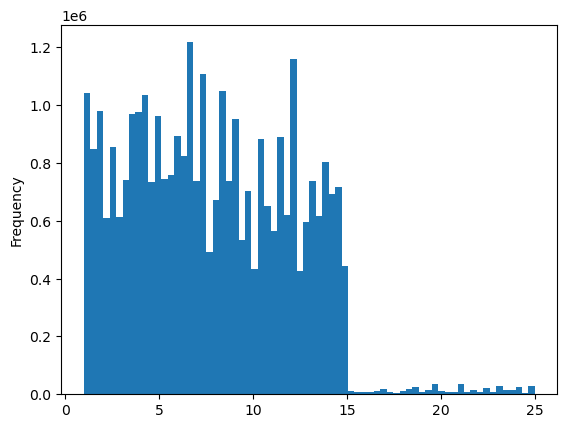

In [10]:
df_full['prices'].plot.hist(bins = 70)

In [4]:
# line Graph and Sampling
## random sample generation
np.random.seed(4)
dev = np.random.rand(len(df_full)) <= 0.7

In [5]:
big = df_full[dev]
small = df_full[~dev]

In [6]:
df_2 = small[['orders_day_of_week','prices']]

KeyboardInterrupt: 

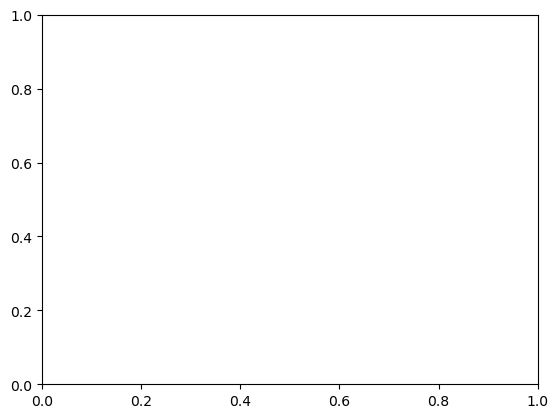

In [9]:
# Plotting Line Graph (Step not required by lesson as it is resource heavy and takes too long)
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')